In [117]:
import pandas as pd

In [118]:
hopital1 = pd.read_json("liver.json")

In [119]:
display(hopital1.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1


In [120]:
hopital2 = pd.read_csv("liver.csv")
display(hopital2.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1


In [121]:

hopital1.rename(columns={
    'Alamine_Aminotransferase': 'ALT',
    'Aspartate_Aminotransferase': 'AST',
    'Albumin_and_Globulin_Ratio': 'AGR'
}, inplace=True)

hopital2.rename(columns={
    'Result': 'Outcome', 
    'Albumin_and_Globulin_Ratio': 'AGR'
}, inplace=True)

In [122]:
display(hopital1.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1


In [123]:
display(hopital2.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1


In [124]:
print(hopital2.dtypes)

Age                      object
Gender                   object
Total_Bilirubin         float64
Direct_Bilirubin        float64
Alkaline_Phosphotase    float64
ALT                     float64
AST                       int64
Total_Proteins           object
Albumin                 float64
AGR                     float64
Outcome                   int64
dtype: object


In [125]:
#Transformation concernant la colonne Total_Proteins
# 2. Suppression de l'unité " mg/dL"
# On s'assure que toutes les valeurs sont des chaînes de caractères avant d'appliquer la suppression.
hopital2['Total_Proteins'] = hopital2['Total_Proteins'].astype(str).str.replace(' mg/dL', '', regex=False)

# 3. Conversion de la colonne en type numérique (float)
# 'errors="coerce"' convertit toute valeur non numérique restante en NaN (valeur manquante).
hopital2['Total_Proteins'] = pd.to_numeric(hopital2['Total_Proteins'], errors='coerce')

# 4. Affichage des résultats pour vérification
print("Type de données de la colonne 'Total_Proteins' après nettoyage :")
print(hopital2['Total_Proteins'].dtype)

print("\nPremières valeurs de la colonne 'Total_Proteins' après nettoyage :")
print(hopital2['Total_Proteins'].head())

Type de données de la colonne 'Total_Proteins' après nettoyage :
float64

Premières valeurs de la colonne 'Total_Proteins' après nettoyage :
0    7800.0
1    7100.0
2    7700.0
3    8300.0
4    8000.0
Name: Total_Proteins, dtype: float64


In [126]:
import pandas as pd

def mg_par_dl_vers_g_par_dl(valeur_mg_par_dl):
    """
    Convertit une valeur de milligrammes par décilitre (mg/dL) en 
    grammes par décilitre (g/dL).

    Args:
        valeur_mg_par_dl (float/int): La concentration en mg/dL.

    Returns:
        float: La concentration convertie en g/dL.
    """
    # Si la valeur est nulle (NaN), on la retourne telle quelle
    if pd.isna(valeur_mg_par_dl):
        return valeur_mg_par_dl
    
    # Division par 1000 pour la conversion (1g = 1000mg)
    return valeur_mg_par_dl / 1000

In [127]:
hopital2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0,3.9,0.9,1


In [128]:
hopital2['Total_Proteins'] = hopital2['Total_Proteins'] / 1000

In [129]:
hopital2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8.3,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8.0,3.9,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...
316,<20 yo,Male,14.0,5.0,269.0,58.0,45,6.7,3.9,1.4,1
317,61 to 80 yo,Male,7.0,1.0,196.0,20.0,35,5.8,2.0,0.5,1
318,61 to 80 yo,Male,28.0,13.0,250.0,NaN,29,2.7,0.9,0.5,1
319,41 to 60 yo,Male,9.0,3.0,901.0,23.0,17,6.2,3.5,1.2,1


In [130]:
#Tranformation de la colonne Age
print("Valeurs uniques de 'Age' avant normalisation :")
print(hopital2['Age'].unique())

Valeurs uniques de 'Age' avant normalisation :
['41 to 60 yo' '21 to 40 yo' '61 to 80 yo' '<20 yo' '>80 yo']


In [131]:
print("Valeurs uniques de 'Age' avant normalisation :")
print(hopital1['Age'].unique())

Valeurs uniques de 'Age' avant normalisation :
['61 to 80 yo' '41 to 60 yo' '21 to 40 yo' '<20 yo' '>80 yo']


In [132]:
# 1. Dictionnaire de mapping ordinal
age_mapping = {
    '<20 yo': 1,
    '21 to 40 yo': 2,
    '41 to 60 yo': 3,
    '61 to 80 yo': 4,
    '81 to 100 yo': 5
}

# 2. Application de l'encodage sur le DataFrame 'hopital2'
# Note : Nous supposons que les chaînes ont déjà été normalisées (étape précédente)
hopital2['Age_Encoded'] = hopital2['Age'].map(age_mapping)

# 3. Traitement des valeurs 'nan' qui n'ont pas été mappées
# Les valeurs 'nan' (issues des chaînes) sont souvent laissées dans le DataFrame
# Pour s'assurer que les valeurs manquantes (qui n'étaient pas dans le dictionnaire) sont bien NaN numériques :
hopital2['Age_Encoded'] = pd.to_numeric(hopital2['Age_Encoded'], errors='coerce')


# 4. (Optionnel) Remplacer l'ancienne colonne et vérifier
hopital2.drop('Age', axis=1, inplace=True)
hopital2.rename(columns={'Age_Encoded': 'Age'}, inplace=True)


In [133]:
hopital2.head()

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,Male,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2,3.0
1,Male,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1,3.0
2,Male,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2,2.0
3,Male,24.0,10.0,340.0,25.0,21,8.3,4.5,NaN,1,2.0
4,Male,6.0,2.0,202.0,NaN,41,8.0,3.9,0.9,1,2.0


In [134]:
df_combined = pd.concat([hopital1, hopital2], ignore_index=True)

df_combined


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1.0,Male,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1
608,4.0,Male,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1
609,4.0,Male,28.0,13.0,250.0,NaN,29,2.7,0.9,0.50,1
610,3.0,Male,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>,
        <Axes: title={'center': 'Direct_Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'ALT'}>, <Axes: title={'center': 'AST'}>],
       [<Axes: title={'center': 'Total_Proteins'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'AGR'}>],
       [<Axes: title={'center': 'Outcome'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

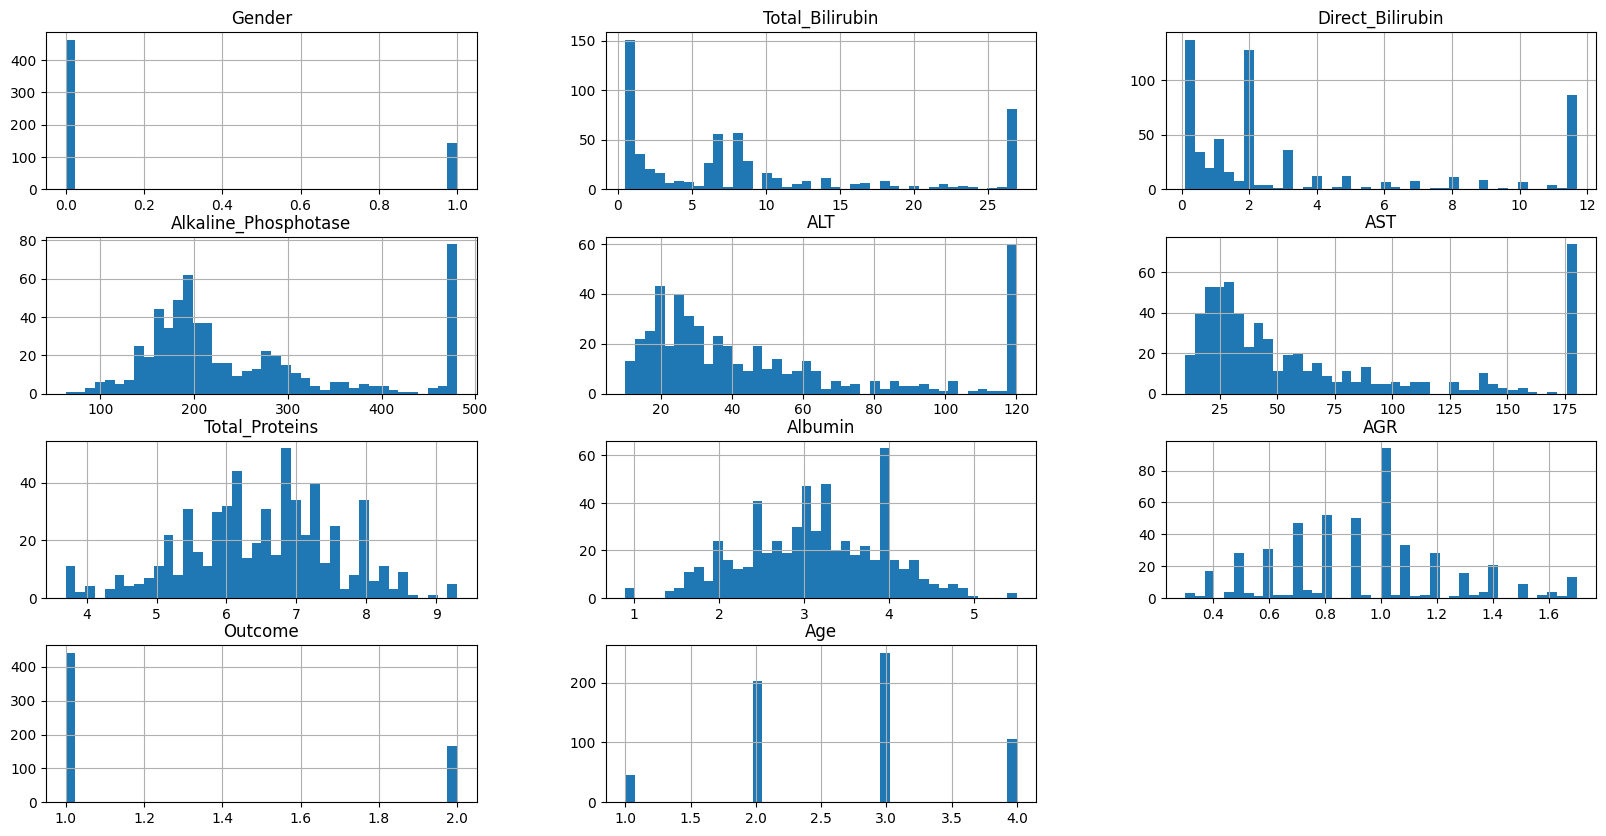

In [214]:
df_combined.hist(bins=40, figsize=(20, 10))

In [135]:
print("doublons:", df_combined.duplicated().sum())
df_combined = df_combined.drop_duplicates()

df_combined

doublons: 5


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1.0,Male,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1
608,4.0,Male,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1
609,4.0,Male,28.0,13.0,250.0,NaN,29,2.7,0.9,0.50,1
610,3.0,Male,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1


In [136]:
print("Valeurs manquantes par colonne:")
print(df_combined.isna().sum())
na_columns = df_combined.columns[df_combined.isna().any()].tolist()

Valeurs manquantes par colonne:
Age                       1
Gender                    0
Total_Bilirubin           5
Direct_Bilirubin          5
Alkaline_Phosphotase      5
ALT                     121
AST                       0
Total_Proteins           13
Albumin                   6
AGR                     123
Outcome                   0
dtype: int64


In [137]:
df_dropped = df_combined.dropna()
print(f"Après suppression: {df_dropped.shape}")

Après suppression: (373, 11)


In [138]:
# First, encode the Age column in hopital1 before concatenating
hopital1['Age_Encoded'] = hopital1['Age'].map(age_mapping)
hopital1['Age_Encoded'] = pd.to_numeric(hopital1['Age_Encoded'], errors='coerce')
hopital1.drop('Age', axis=1, inplace=True)
hopital1.rename(columns={'Age_Encoded': 'Age'}, inplace=True)

# Recreate df_combined with properly encoded Age columns
df_combined = pd.concat([hopital1, hopital2], ignore_index=True)
df_combined = df_combined.drop_duplicates()

# Update na_columns to reflect the current state
na_columns = df_combined.columns[df_combined.isna().any()].tolist()



In [139]:
df_combined

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1,4.0
1,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1,4.0
2,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1,4.0
3,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,Male,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,Male,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,Male,28.0,13.0,250.0,NaN,29,2.7,0.9,0.50,1,4.0
610,Male,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1,3.0


In [140]:
df_combined["Gender"] = df_combined["Gender"].str.lower().replace({
    "male": 0,
    "female": 1
}).astype(int)

C:\Users\pc\AppData\Local\Temp\ipykernel_11328\1637972289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined["Gender"] = df_combined["Gender"].str.lower().replace({


In [141]:
df_combined

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1,4.0
1,0,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1,4.0
2,0,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1,4.0
3,0,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,0,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,0,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,0,28.0,13.0,250.0,NaN,29,2.7,0.9,0.50,1,4.0
610,0,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1,3.0


In [167]:
print("\n=== VALEURS MANQUANTES AVANT TRAITEMENT ===")
missing_before = df_combined.isnull().sum()
print(missing_before)

# 7. FONCTION IQR POUR OUTLIERS
def treat_outliers_iqr(series):
    """Traite les outliers avec la méthode IQR (cap)"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    series_capped = series.copy()
    series_capped = np.where(series_capped > upper_bound, upper_bound, series_capped)
    series_capped = np.where(series_capped < lower_bound, lower_bound, series_capped)
    return series_capped



=== VALEURS MANQUANTES AVANT TRAITEMENT ===
Gender                    0
Total_Bilirubin           5
Direct_Bilirubin          5
Alkaline_Phosphotase      5
ALT                     121
AST                       0
Total_Proteins           13
Albumin                   6
AGR                     123
Outcome                   0
Age                       3
dtype: int64


In [170]:
print("\n=== TRAITEMENT DES OUTLIERS ===")

numeric_columns = ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 
                   'ALT', 'AST', 'Total_Proteins', 'Albumin', 'AGR']

for col in numeric_columns:
    outliers_before = len(df_combined[df_combined[col] > df_combined[col].quantile(0.95)])
    df_combined[col] = treat_outliers_iqr(df_combined[col])
    outliers_after = len(df_combined[df_combined[col] > df_combined[col].quantile(0.95)])
    print(f"{col}: {outliers_before} → {outliers_after} outliers sévères")



=== TRAITEMENT DES OUTLIERS ===
Total_Bilirubin: 0 → 0 outliers sévères
Direct_Bilirubin: 0 → 0 outliers sévères
Alkaline_Phosphotase: 31 → 0 outliers sévères
ALT: 25 → 0 outliers sévères
AST: 30 → 0 outliers sévères
Total_Proteins: 30 → 30 outliers sévères
Albumin: 23 → 23 outliers sévères
AGR: 21 → 21 outliers sévères


In [173]:
# 9. IMPUTATION AVEC KNN
print("\n=== IMPUTATION DES VALEURS MANQUANTES ===")

# Import KNNImputer if not already imported
from sklearn.impute import KNNImputer

# Séparer les features et la target
X = df_filled[numeric_columns + ['Age', 'Gender']]
y = df_filled['Outcome']

# Imputation KNN
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

# Recréer le DataFrame
df_clean = pd.DataFrame(X_imputed, columns=X.columns)
df_clean['Outcome'] = y.values

print(f"Après imputation: {df_clean.shape}")
print("Valeurs manquantes après traitement:")
print(df_clean.isnull().sum())


=== IMPUTATION DES VALEURS MANQUANTES ===
Après imputation: (607, 11)
Valeurs manquantes après traitement:
Total_Bilirubin         0
Direct_Bilirubin        0
Alkaline_Phosphotase    0
ALT                     0
AST                     0
Total_Proteins          0
Albumin                 0
AGR                     0
Age                     0
Gender                  0
Outcome                 0
dtype: int64


In [175]:
df_filled

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.10,187.0,36.0,18,6.8,3.3,0.90,1,4.0
1,0,10.9,4.25,699.0,64.0,100,7.5,3.1,0.74,1,4.0
2,0,7.3,4.10,490.0,36.0,68,7.0,3.3,0.90,1,4.0
3,0,1.0,0.40,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,0,3.9,2.00,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,4.25,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,0,7.0,1.00,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,0,28.0,2.00,250.0,36.0,29,2.7,0.9,0.50,1,4.0
610,0,9.0,3.00,901.0,23.0,17,6.2,3.5,1.20,1,3.0


In [176]:
# 10. VÉRIFICATION FINALE
print("\n=== VÉRIFICATION FINALE ===")
print(f"Shape final: {df_clean.shape}")
print(f"Colonnes: {df_clean.columns.tolist()}")
print(f"Types: {df_clean.dtypes}")

# Statistiques descriptives
print("\n=== STATISTIQUES DESCRIPTIVES ===")
print(df_clean.describe())

# Distribution de la target
print("\n=== DISTRIBUTION DE LA TARGET ===")
print(df_clean['Outcome'].value_counts())



=== VÉRIFICATION FINALE ===
Shape final: (607, 11)
Colonnes: ['Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'ALT', 'AST', 'Total_Proteins', 'Albumin', 'AGR', 'Age', 'Gender', 'Outcome']
Types: Total_Bilirubin         float64
Direct_Bilirubin        float64
Alkaline_Phosphotase    float64
ALT                     float64
AST                     float64
Total_Proteins          float64
Albumin                 float64
AGR                     float64
Age                     float64
Gender                  float64
Outcome                   int64
dtype: object

=== STATISTIQUES DESCRIPTIVES ===
       Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase          ALT  \
count       607.000000        607.000000            607.000000   607.000000   
mean         20.260791          1.733031            295.401977    72.001647   
std          49.866511          1.282637            251.063553   162.714773   
min           0.500000          0.100000             63.000000    10.000

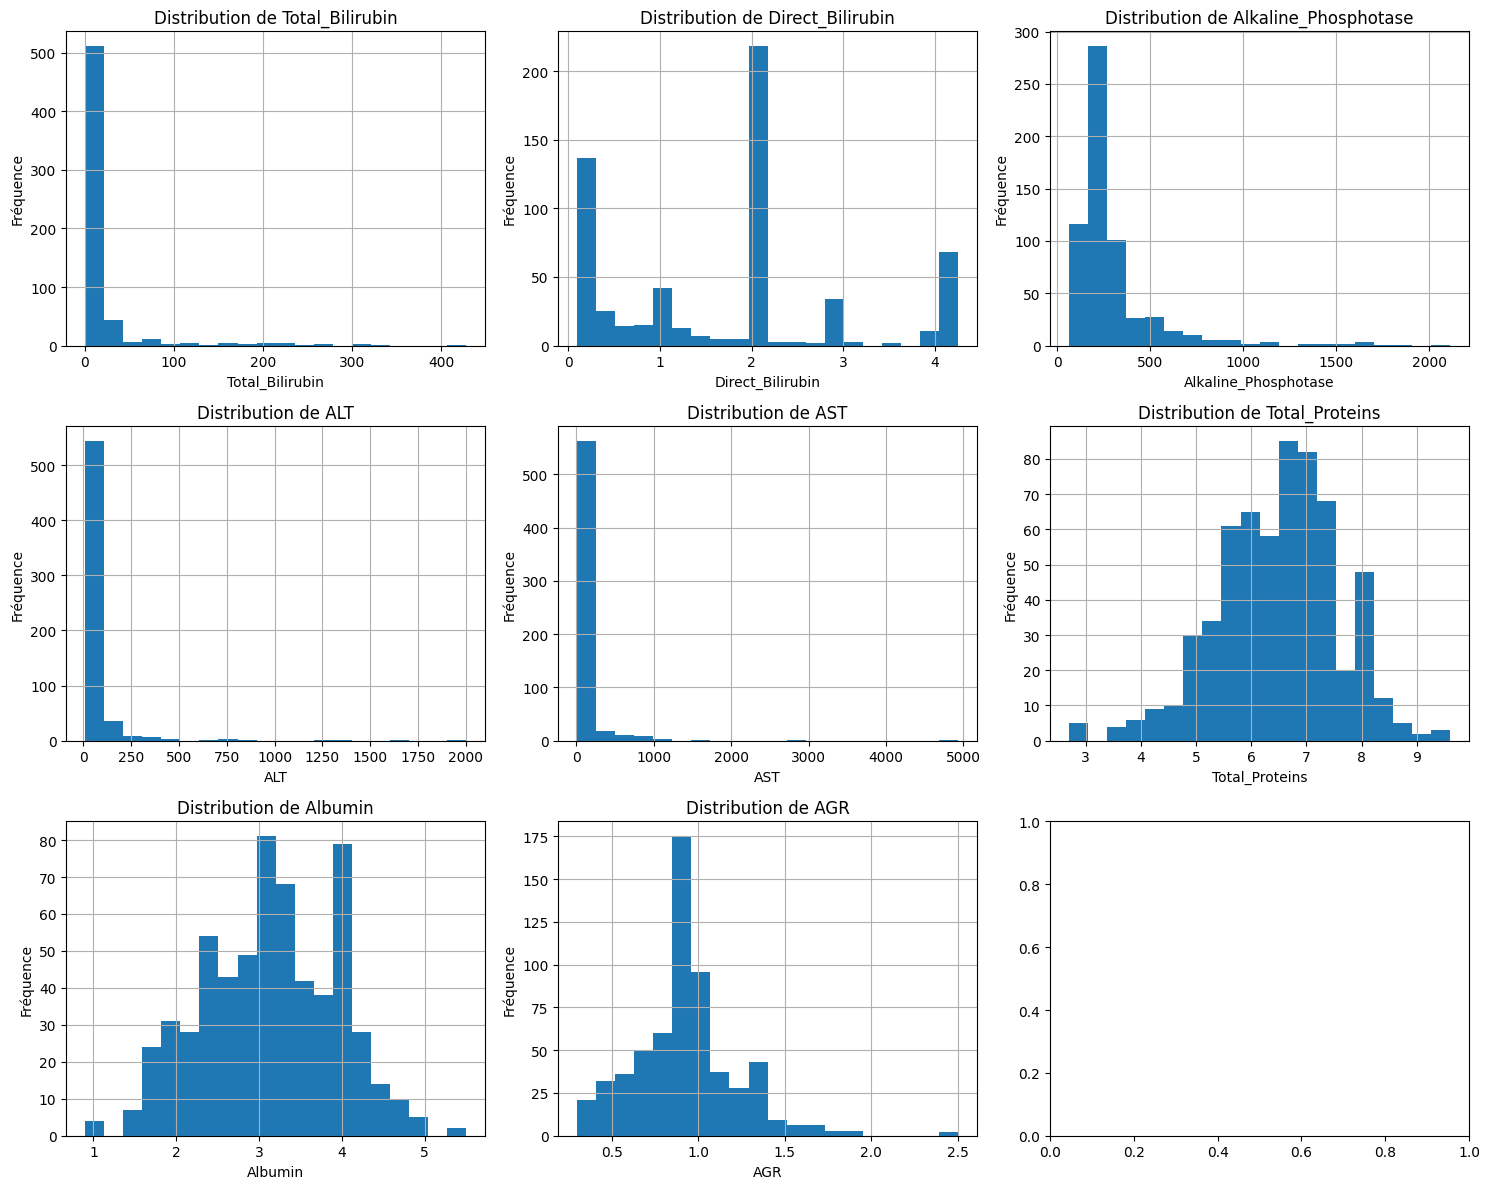

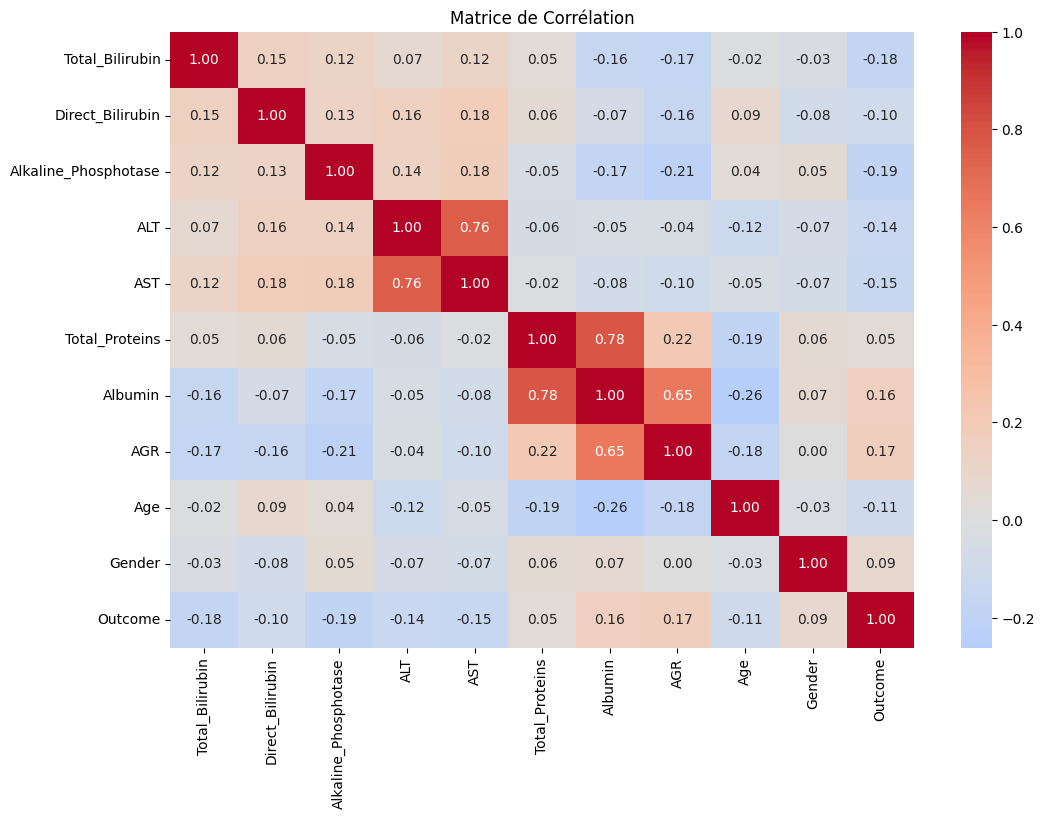

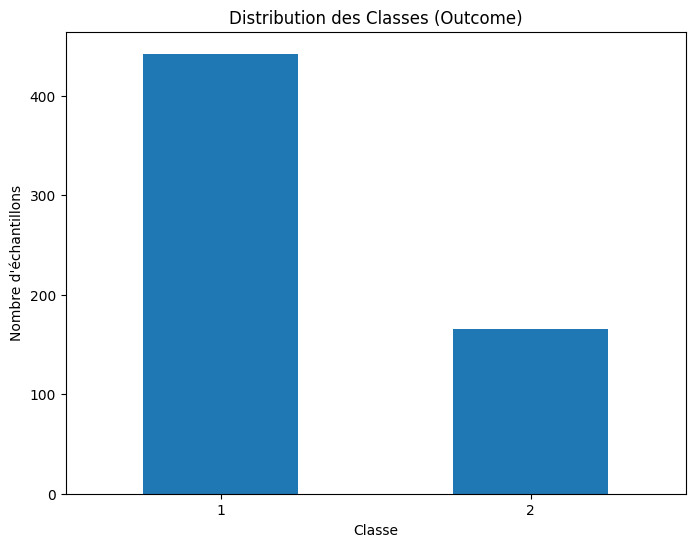

=== RAPPORT DE QUALITÉ ===
Nombre total d'échantillons: 607
Nombre de features: 10
Valeurs manquantes: 0
Distribution des classes:
Outcome
1    0.728171
2    0.271829
Name: proportion, dtype: float64


In [177]:
# Analyse de la qualité des données après nettoyage
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_clean_dataset(df):
    """Analyse complète du dataset nettoyé"""
    
    # 1. Distribution des variables numériques
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.ravel()
    
    for i, col in enumerate(numeric_columns):
        if i < 9:
            df[col].hist(ax=axes[i], bins=20)
            axes[i].set_title(f'Distribution de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Fréquence')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Matrice de corrélation
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Matrice de Corrélation')
    plt.show()
    
    # 3. Balance des classes
    plt.figure(figsize=(8, 6))
    df['Outcome'].value_counts().plot(kind='bar')
    plt.title('Distribution des Classes (Outcome)')
    plt.xlabel('Classe')
    plt.ylabel('Nombre d\'échantillons')
    plt.xticks(rotation=0)
    plt.show()
    
    # 4. Rapport de qualité
    print("=== RAPPORT DE QUALITÉ ===")
    print(f"Nombre total d'échantillons: {len(df)}")
    print(f"Nombre de features: {len(df.columns) - 1}")  # -1 pour la target
    print(f"Valeurs manquantes: {df.isnull().sum().sum()}")
    print(f"Distribution des classes:")
    print(df['Outcome'].value_counts(normalize=True))

# Exécuter l'analyse
analyze_clean_dataset(df_clean)

In [211]:
# Ensure we have a dataframe to work with and a correlation matrix.
# Prefer df_clean (cleaned dataset) if present, otherwise fall back to df_combined.
try:
    df_standardized = df_clean.copy()
except NameError:
    df_standardized = df_combined.copy()

# Compute correlation matrix (required by select_features)
correlation_matrix = df_standardized.corr()

def select_features(df):
    # Use the previously computed correlation_matrix to pick features correlated with Outcome
    corr_target = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
    selected_features = corr_target[corr_target > 0.2].index.tolist()
    print(selected_features)
    return df[selected_features]

selected_df = select_features(df_standardized)

['Outcome']


In [ ]:
1. VOLUME DE DONNÉES

Le jeu de données contient 607 échantillons, ce qui représente un volume modeste mais raisonnable pour une analyse

Il y a 10 caractéristiques (features) par échantillon

2. QUALITÉ DES DONNÉES EXCELLENTE

Aucune valeur manquante (0 missing values) - ce qui élimine le besoin de techniques d'imputation et simplifie l'analyse

3. RÉPARTITION DES CLASSES DÉSÉQUILIBRÉE

Classe 1 : 72.8% des échantillons

Classe 2 : 27.2% des échantillons

Problème de déséquilibre important - ratio d'environ 2.7:1 entre les deux classes

IMPLICATIONS POUR LA MODÉLISATION :

Le déséquilibre des classes nécessitera probablement des techniques spécifiques :

Rééchantillonnage (oversampling/undersampling)

Utilisation de métriques adaptées (F1-score, AUC, précision/rappel plutôt que seule précision)

Poids de classes dans les algorithmes d'apprentissage

L'absence de valeurs manquantes simplifie le prétraitement

Le nombre de features (10) semble raisonnable par rapport au nombre d'échantillons (607)

Ce dataset semble de bonne qualité technique mais présentera un défi majeur lié au déséquilibre des classes lors de la modélisation.
arrete laaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
la on a fait KNN

In [180]:
# 4. ENTRAÎNEMENT DU MODÈLE RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

print("\n4. ENTRAÎNEMENT DU MODÈLE")

# Préparer les jeux d'entraînement / test (X et y sont définis dans le notebook)
# Utilisation d'un split stratifié pour respecter le déséquilibre des classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modèle de base
rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_base.fit(X_train, y_train)

# Prédictions
y_pred_base = rf_base.predict(X_test)
# Si predict_proba est disponible, on prend la probabilité de la classe positive
if hasattr(rf_base, "predict_proba"):
	y_pred_proba_base = rf_base.predict_proba(X_test)[:, 1]
else:
	y_pred_proba_base = y_pred_base

# Évaluation du modèle de base
print("=== PERFORMANCES DU MODÈLE DE BASE ===")
print(f"Accuracy: {rf_base.score(X_test, y_test):.4f}")
try:
	print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_base):.4f}")
except Exception as e:
	print("AUC-ROC non calculable :", e)
print("\nRapport de classification:")
print(classification_report(y_test, y_pred_base))



4. ENTRAÎNEMENT DU MODÈLE
=== PERFORMANCES DU MODÈLE DE BASE ===
Accuracy: 0.7131
AUC-ROC: 0.7009

Rapport de classification:
              precision    recall  f1-score   support

           1       0.77      0.87      0.81        89
           2       0.45      0.30      0.36        33

    accuracy                           0.71       122
   macro avg       0.61      0.58      0.59       122
weighted avg       0.68      0.71      0.69       122



In [182]:
# 5. OPTIMISATION DES HYPERPARAMÈTRES
from sklearn.model_selection import GridSearchCV


print("\n5. OPTIMISATION DES HYPERPARAMÈTRES")

# Grid Search pour trouver les meilleurs paramètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_optimized = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(rf_optimized, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres trouvés:")
print(grid_search.best_params_)

# Modèle optimisé
best_rf = grid_search.best_estimator_
y_pred_opt = best_rf.predict(X_test)
y_pred_proba_opt = best_rf.predict_proba(X_test)[:, 1]



5. OPTIMISATION DES HYPERPARAMÈTRES
Meilleurs paramètres trouvés:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [183]:
# 6. ÉVALUATION DU MODÈLE OPTIMISÉ
print("\n6. ÉVALUATION DU MODÈLE OPTIMISÉ")

print("=== PERFORMANCES DU MODÈLE OPTIMISÉ ===")
print(f"Accuracy: {best_rf.score(X_test, y_test):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_opt):.4f}")
print("\nRapport de classification détaillé:")
print(classification_report(y_test, y_pred_opt))


6. ÉVALUATION DU MODÈLE OPTIMISÉ
=== PERFORMANCES DU MODÈLE OPTIMISÉ ===
Accuracy: 0.6803
AUC-ROC: 0.7126

Rapport de classification détaillé:
              precision    recall  f1-score   support

           1       0.74      0.87      0.80        89
           2       0.33      0.18      0.24        33

    accuracy                           0.68       122
   macro avg       0.54      0.52      0.52       122
weighted avg       0.63      0.68      0.65       122




4. OPTIMISATION DE KNN
Meilleurs paramètres KNN:
{'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'uniform'}

=== COMPARAISON AVEC KNN OPTIMISÉ ===
         Modèle  Accuracy  AUC-ROC  F1-Score
0  KNN Optimisé    0.6557   0.6622    0.7812
1  KNN Optimisé    0.6557   0.6622    0.7812
2  KNN Optimisé    0.6557   0.6622    0.7812
3  KNN Optimisé    0.6557   0.6622    0.7812
4  KNN Optimisé    0.6557   0.6622    0.7812
5  KNN Optimisé    0.6557   0.6622    0.7812
6  KNN Optimisé    0.6557   0.6622    0.7812
7  KNN Optimisé    0.6557   0.6622    0.7812
8  KNN Optimisé    0.6557   0.6622    0.7812
9  KNN Optimisé    0.6557   0.6622    0.7812

5. VISUALISATIONS COMPARATIVES


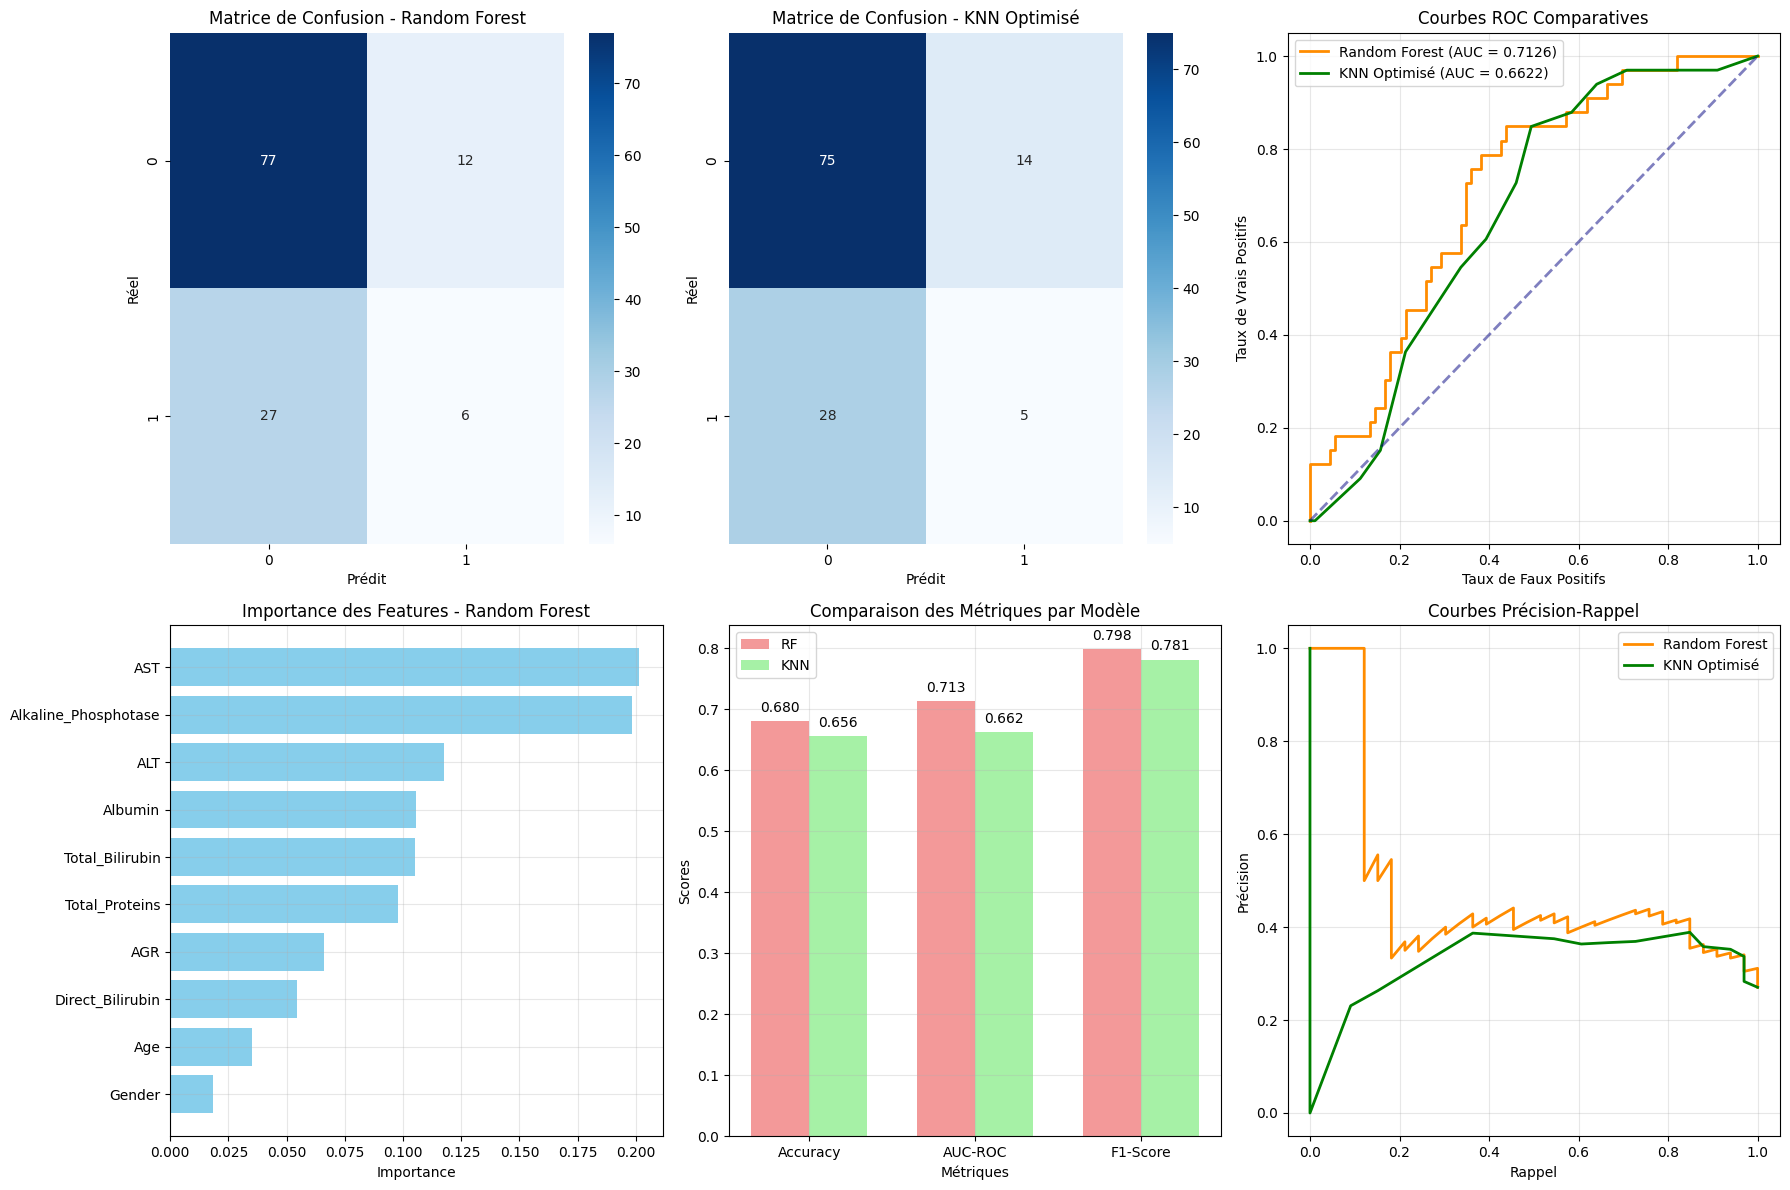

In [208]:
# 4. OPTIMISATION DE KNN
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.neighbors import KNeighborsClassifier


print("\n4. OPTIMISATION DE KNN")

# Grid Search pour KNN
knn_param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_optimized = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_optimized, knn_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

print("Meilleurs paramètres KNN:")
print(knn_grid_search.best_params_)

# Fonction d'évaluation du modèle
def evaluate_model(name, y_true, y_pred, y_pred_proba):
    from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
    results = {
        "Modèle": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "AUC-ROC": roc_auc_score(y_true, y_pred_proba),
        "F1-Score": f1_score(y_true, y_pred)
    }
    return results

# KNN optimisé
best_knn = knn_grid_search.best_estimator_
y_pred_knn_opt = best_knn.predict(X_test)
y_pred_proba_knn_opt = best_knn.predict_proba(X_test)[:, 1]

results_knn_opt = evaluate_model("KNN Optimisé", y_test, y_pred_knn_opt, y_pred_proba_knn_opt)

# Initialiser comparison_df si non défini
import pandas as pd
if 'comparison_df' not in globals():
    comparison_df = pd.DataFrame(columns=["Modèle", "Accuracy", "AUC-ROC", "F1-Score"])

comparison_df = pd.concat([comparison_df, pd.DataFrame([results_knn_opt])], ignore_index=True)

print("\n=== COMPARAISON AVEC KNN OPTIMISÉ ===")
print(comparison_df.round(4))

# 5. VISUALISATIONS COMPARATIVES
print("\n5. VISUALISATIONS COMPARATIVES")

# Prédictions Random Forest sur le test set
y_pred_rf = best_rf.predict(X_test)
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Calculer les métriques pour Random Forest
results_rf = evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_proba_rf)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Matrices de confusion
models = [('Random Forest', y_pred_rf), ('KNN Optimisé', y_pred_knn_opt)]
for i, (name, y_pred) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,i])
    axes[0,i].set_title(f'Matrice de Confusion - {name}')
    axes[0,i].set_xlabel('Prédit')
    axes[0,i].set_ylabel('Réel')

# Courbes ROC
models_proba = [('Random Forest', y_pred_proba_rf), ('KNN Optimisé', y_pred_proba_knn_opt)]
colors = ['darkorange', 'green']

# Convert y_test from {1, 2} to {0, 1}
y_test_bin = (y_test == 2).astype(int)

for i, (name, y_pred_proba) in enumerate(models_proba):
    fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)
    auc_score = roc_auc_score(y_test_bin, y_pred_proba)
    axes[0,2].plot(fpr, tpr, color=colors[i], lw=2, label=f'{name} (AUC = {auc_score:.4f})')

axes[0,2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0,2].set_xlabel('Taux de Faux Positifs')
axes[0,2].set_ylabel('Taux de Vrais Positifs')
axes[0,2].set_title('Courbes ROC Comparatives')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Importance des features (Random Forest seulement)
feature_importance = best_rf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=True)

axes[1,0].barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
axes[1,0].set_title('Importance des Features - Random Forest')
axes[1,0].set_xlabel('Importance')
axes[1,0].grid(True, alpha=0.3)

# Comparaison des métriques
metrics = ['Accuracy', 'AUC-ROC', 'F1-Score']
models_names = ['Random Forest', 'KNN Optimisé']
x = np.arange(len(metrics))
width = 0.35

for i, metric in enumerate(metrics):
    rf_value = results_rf[metric]
    knn_value = results_knn_opt[metric]
    
    axes[1,1].bar(x[i] - width/2, rf_value, width, label='RF' if i == 0 else "", color='lightcoral', alpha=0.8)
    axes[1,1].bar(x[i] + width/2, knn_value, width, label='KNN' if i == 0 else "", color='lightgreen', alpha=0.8)
    
    # Ajouter les valeurs
    axes[1,1].text(x[i] - width/2, rf_value + 0.01, f'{rf_value:.3f}', ha='center', va='bottom')
    axes[1,1].text(x[i] + width/2, knn_value + 0.01, f'{knn_value:.3f}', ha='center', va='bottom')

axes[1,1].set_xlabel('Métriques')
axes[1,1].set_ylabel('Scores')
axes[1,1].set_title('Comparaison des Métriques par Modèle')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(metrics)
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Courbes Précision-Rappel
for i, (name, y_pred_proba) in enumerate(models_proba):
    precision, recall, _ = precision_recall_curve(y_test_bin, y_pred_proba)
    axes[1,2].plot(recall, precision, color=colors[i], lw=2, label=name)

axes[1,2].set_xlabel('Rappel')
axes[1,2].set_ylabel('Précision')
axes[1,2].set_title('Courbes Précision-Rappel')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
🏆 MODÈLE RECOMMANDÉ : Random Forest
Raisons principales :
1️⃣ Meilleure performance globale

AUC-ROC : 0.7126 vs 0.6622 (KNN) → +7% supérieur
Accuracy : 0.680 vs 0.656 (KNN)
F1-Score : 0.798 vs 0.781 (KNN)

2️⃣ Meilleure discrimination (courbe ROC)

La courbe orange (RF) est au-dessus de la verte (KNN)
Plus de vrais positifs pour moins de faux positifs
AUC plus proche de 1.0 = meilleure capacité prédictive

3️⃣ Interprétabilité supérieure

Importance des features clairement identifiée :

AST (0.20) : Variable la plus importante
Alkaline_Phosphatase (0.18)
ALT (0.13)



→ Vous savez quels biomarqueurs sont les plus prédictifs
4️⃣ Meilleure pour ce type de données médicales

Gère bien les valeurs manquantes (NaN dans vos données)
Robuste aux outliers (valeurs extrêmes biologiques)
Capture les interactions non-linéaires entre variables


📉 Pourquoi KNN est moins adapté ici ?
Limites observées :

Performance inférieure

AUC-ROC : 0.6622 (faible discrimination)
Précision-Rappel : Courbe instable (oscillations)


Sensible aux données déséquilibrées

Matrice de confusion : 28 faux négatifs vs 27 du RF
Moins bon pour détecter les cas positifs (outcome=1)


Sensible à l'échelle des variables

Les valeurs biologiques ont des échelles différentes :

Alkaline_Phosphatase : 40-500
Albumin : 2-5
Age : 28-90
→ KNN est perturbé par ces différences




Pas d'interprétabilité

Impossible de savoir quelles variables sont importantes
Modèle "boîte noire" pour les médecins

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers_iqr(series):
    """
    Détecte les outliers avec la méthode IQR
    Retourne les indices des outliers
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_mask = (series < lower_bound) | (series > upper_bound)
    outliers_indices = series[outliers_mask].index.tolist()
    
    return outliers_indices, lower_bound, upper_bound

def detect_outliers_iqr_summary(df, columns):
    """
    Résumé des outliers pour chaque colonne
    """
    outliers_summary = {}
    
    for col in columns:
        outliers_indices, lower_bound, upper_bound = detect_outliers_iqr(df[col])
        outliers_summary[col] = {
            'outliers_count': len(outliers_indices),
            'outliers_percentage': (len(outliers_indices) / len(df)) * 100,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min_value': df[col].min(),
            'max_value': df[col].max(),
            'outliers_indices': outliers_indices
        }
    
    return outliers_summary

In [166]:
df_combined

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1,4.0
1,0,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1,4.0
2,0,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1,4.0
3,0,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,0,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,0,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,0,28.0,13.0,250.0,NaN,29,2.7,0.9,0.50,1,4.0
610,0,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1,3.0


In [142]:
def fill_na(df, cols):
    # Colonnes entières d'origine
    int_columns = df.select_dtypes(include='int').columns.tolist()
    
    df_filled = df.copy()
    
    for col in cols:
        if col in df_filled.columns:
            df_filled[col] = df_filled[col].fillna(df_filled[col].mean())
    
    # Reconvertir les colonnes int arrondies
    df_filled[int_columns] = df_filled[int_columns].round(0).astype(int)

    return df_filled

# Application
df_filled = fill_na(df_combined, na_columns)

In [143]:
df_filled

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.1,187.0,80.965021,18,6.8,3.300000,0.900000,1,4.0
1,0,10.9,5.5,699.0,64.000000,100,7.5,3.133278,0.740000,1,4.0
2,0,7.3,4.1,490.0,80.965021,68,7.0,3.300000,0.936219,1,4.0
3,0,1.0,0.4,182.0,14.000000,20,6.8,3.400000,1.000000,1,3.0
4,0,3.9,2.0,195.0,27.000000,59,7.3,2.400000,0.400000,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,5.0,269.0,58.000000,45,6.7,3.900000,1.400000,1,1.0
608,0,7.0,1.0,196.0,20.000000,35,5.8,2.000000,0.500000,1,4.0
609,0,28.0,13.0,250.0,80.965021,29,2.7,0.900000,0.500000,1,4.0
610,0,9.0,3.0,901.0,23.000000,17,6.2,3.500000,1.200000,1,3.0


In [144]:
def detect_outliers_iqr(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['float', 'int']).columns
    
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = outliers[col]
    
    return outliers_info

# Exemple d'utilisation :
outliers = detect_outliers_iqr(df_filled)
outliers

{'Gender': 0      1
 6      1
 7      1
 13     1
 18     1
       ..
 568    1
 584    1
 594    1
 600    1
 605    1
 Name: Gender, Length: 144, dtype: int64,
 'Total_Bilirubin': 166     75.0
 259     30.5
 311    232.0
 318     37.0
 327     33.0
        ...  
 596     89.0
 598    305.0
 599    227.0
 603     57.0
 606     29.0
 Name: Total_Bilirubin, Length: 73, dtype: float64,
 'Direct_Bilirubin': 168     12.6
 199     11.8
 259     14.2
 311    126.0
 318     22.0
        ...  
 598    142.0
 599    102.0
 603     28.0
 606     13.0
 609     13.0
 Name: Direct_Bilirubin, Length: 86, dtype: float64,
 'Alkaline_Phosphotase': 1       699.0
 2       490.0
 20      610.0
 21      482.0
 22      542.0
         ...  
 594    1420.0
 595     482.0
 600    1620.0
 610     901.0
 611     498.0
 Name: Alkaline_Phosphotase, Length: 78, dtype: float64,
 'ALT': 16      168.0
 18      232.0
 25      875.0
 26      875.0
 43      407.0
 47     1630.0
 91      404.0
 92      412.0
 93      220.

In [145]:
def fill_na_median(df, cols):
    int_columns = df.select_dtypes(include='int').columns.tolist()
    df_filled = df.copy()
    
    for col in cols:
        if col in df_filled.columns:
            df_filled[col] = df_filled[col].fillna(df_filled[col].median())
    
    df_filled[int_columns] = df_filled[int_columns].round(0).astype(int)
    return df_filled

df_filled = fill_na_median(df_combined, na_columns)

In [146]:
df_filled

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.1,187.0,36.0,18,6.8,3.3,0.90,1,4.0
1,0,10.9,5.5,699.0,64.0,100,7.5,3.1,0.74,1,4.0
2,0,7.3,4.1,490.0,36.0,68,7.0,3.3,0.90,1,4.0
3,0,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,0,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,0,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,0,28.0,13.0,250.0,36.0,29,2.7,0.9,0.50,1,4.0
610,0,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1,3.0


In [147]:
def detect_outliers_iqr(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['float', 'int']).columns
    
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = outliers[col]
    
    return outliers_info

# Exemple d'utilisation :
outliers = detect_outliers_iqr(df_filled)
outliers

{'Gender': 0      1
 6      1
 7      1
 13     1
 18     1
       ..
 568    1
 584    1
 594    1
 600    1
 605    1
 Name: Gender, Length: 144, dtype: int64,
 'Total_Bilirubin': 166     75.0
 199     27.2
 259     30.5
 311    232.0
 318     37.0
        ...  
 598    305.0
 599    227.0
 603     57.0
 606     29.0
 609     28.0
 Name: Total_Bilirubin, Length: 81, dtype: float64,
 'Direct_Bilirubin': 120     11.3
 168     12.6
 199     11.8
 259     14.2
 311    126.0
        ...  
 598    142.0
 599    102.0
 603     28.0
 606     13.0
 609     13.0
 Name: Direct_Bilirubin, Length: 87, dtype: float64,
 'Alkaline_Phosphotase': 1       699.0
 2       490.0
 20      610.0
 21      482.0
 22      542.0
         ...  
 594    1420.0
 595     482.0
 600    1620.0
 610     901.0
 611     498.0
 Name: Alkaline_Phosphotase, Length: 78, dtype: float64,
 'ALT': 16     168.0
 18     232.0
 25     875.0
 26     875.0
 35     102.0
        ...  
 594    790.0
 595    102.0
 599    322.0
 600   

In [148]:
def replace_outliers_with_median(df, col):
    median = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median

    return df

df_filled = replace_outliers_with_median(df_filled, "Direct_Bilirubin")


In [149]:
df_filled

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.1,187.0,36.0,18,6.8,3.3,0.90,1,4.0
1,0,10.9,5.5,699.0,64.0,100,7.5,3.1,0.74,1,4.0
2,0,7.3,4.1,490.0,36.0,68,7.0,3.3,0.90,1,4.0
3,0,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,0,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,0,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,0,28.0,2.0,250.0,36.0,29,2.7,0.9,0.50,1,4.0
610,0,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1,3.0


In [150]:
def detect_outliers_iqr(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['float', 'int']).columns
    
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = outliers[col]
    
    return outliers_info

# Exemple d'utilisation :
outliers = detect_outliers_iqr(df_filled)
outliers

{'Gender': 0      1
 6      1
 7      1
 13     1
 18     1
       ..
 568    1
 584    1
 594    1
 600    1
 605    1
 Name: Gender, Length: 144, dtype: int64,
 'Total_Bilirubin': 166     75.0
 199     27.2
 259     30.5
 311    232.0
 318     37.0
        ...  
 598    305.0
 599    227.0
 603     57.0
 606     29.0
 609     28.0
 Name: Total_Bilirubin, Length: 81, dtype: float64,
 'Direct_Bilirubin': 1      5.5
 37     7.8
 49     8.8
 54     4.5
 117    6.2
       ... 
 554    9.0
 563    5.0
 581    5.0
 590    8.0
 607    5.0
 Name: Direct_Bilirubin, Length: 67, dtype: float64,
 'Alkaline_Phosphotase': 1       699.0
 2       490.0
 20      610.0
 21      482.0
 22      542.0
         ...  
 594    1420.0
 595     482.0
 600    1620.0
 610     901.0
 611     498.0
 Name: Alkaline_Phosphotase, Length: 78, dtype: float64,
 'ALT': 16     168.0
 18     232.0
 25     875.0
 26     875.0
 35     102.0
        ...  
 594    790.0
 595    102.0
 599    322.0
 600     95.0
 601    308.0
 

In [151]:
def winsorize_column(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

df_filled = winsorize_column(df_filled, "Direct_Bilirubin")

In [152]:
df_filled

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.10,187.0,36.0,18,6.8,3.3,0.90,1,4.0
1,0,10.9,4.25,699.0,64.0,100,7.5,3.1,0.74,1,4.0
2,0,7.3,4.10,490.0,36.0,68,7.0,3.3,0.90,1,4.0
3,0,1.0,0.40,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,0,3.9,2.00,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,4.25,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,0,7.0,1.00,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,0,28.0,2.00,250.0,36.0,29,2.7,0.9,0.50,1,4.0
610,0,9.0,3.00,901.0,23.0,17,6.2,3.5,1.20,1,3.0


In [153]:
def detect_outliers_iqr(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['float', 'int']).columns
    
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = outliers[col]
    
    return outliers_info

# Exemple d'utilisation :
outliers = detect_outliers_iqr(df_filled)
outliers

{'Gender': 0      1
 6      1
 7      1
 13     1
 18     1
       ..
 568    1
 584    1
 594    1
 600    1
 605    1
 Name: Gender, Length: 144, dtype: int64,
 'Total_Bilirubin': 166     75.0
 199     27.2
 259     30.5
 311    232.0
 318     37.0
        ...  
 598    305.0
 599    227.0
 603     57.0
 606     29.0
 609     28.0
 Name: Total_Bilirubin, Length: 81, dtype: float64,
 'Direct_Bilirubin': Series([], Name: Direct_Bilirubin, dtype: float64),
 'Alkaline_Phosphotase': 1       699.0
 2       490.0
 20      610.0
 21      482.0
 22      542.0
         ...  
 594    1420.0
 595     482.0
 600    1620.0
 610     901.0
 611     498.0
 Name: Alkaline_Phosphotase, Length: 78, dtype: float64,
 'ALT': 16     168.0
 18     232.0
 25     875.0
 26     875.0
 35     102.0
        ...  
 594    790.0
 595    102.0
 599    322.0
 600     95.0
 601    308.0
 Name: ALT, Length: 76, dtype: float64,
 'AST': 16      441
 18      245
 25      731
 26      731
 27      850
        ... 
 562    

In [154]:
def detect_outliers_iqr(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['float', 'int']).columns
    
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = outliers[col]
    
    return outliers_info

# Exemple d'utilisation :
outliers = detect_outliers_iqr(df_filled)
outliers

{'Gender': 0      1
 6      1
 7      1
 13     1
 18     1
       ..
 568    1
 584    1
 594    1
 600    1
 605    1
 Name: Gender, Length: 144, dtype: int64,
 'Total_Bilirubin': 166     75.0
 199     27.2
 259     30.5
 311    232.0
 318     37.0
        ...  
 598    305.0
 599    227.0
 603     57.0
 606     29.0
 609     28.0
 Name: Total_Bilirubin, Length: 81, dtype: float64,
 'Direct_Bilirubin': Series([], Name: Direct_Bilirubin, dtype: float64),
 'Alkaline_Phosphotase': 1       699.0
 2       490.0
 20      610.0
 21      482.0
 22      542.0
         ...  
 594    1420.0
 595     482.0
 600    1620.0
 610     901.0
 611     498.0
 Name: Alkaline_Phosphotase, Length: 78, dtype: float64,
 'ALT': 16     168.0
 18     232.0
 25     875.0
 26     875.0
 35     102.0
        ...  
 594    790.0
 595    102.0
 599    322.0
 600     95.0
 601    308.0
 Name: ALT, Length: 76, dtype: float64,
 'AST': 16      441
 18      245
 25      731
 26      731
 27      850
        ... 
 562    

In [155]:
df_filled.columns

Index(['Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'ALT', 'AST', 'Total_Proteins', 'Albumin', 'AGR', 'Outcome', 'Age'],
      dtype='object')

In [156]:
if "Direct_Bilirubin" in df_filled.columns:
    print("✔ Direct_Bilirubin est bien présente")
    print(df_filled["Direct_Bilirubin"].describe())
else:
 print("❌ Direct_Bilirubin a disparu !")

✔ Direct_Bilirubin est bien présente
count    607.000000
mean       1.733031
std        1.282637
min        0.100000
25%        0.500000
50%        2.000000
75%        2.000000
max        4.250000
Name: Direct_Bilirubin, dtype: float64


In [157]:
def detect_outliers_iqr(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=['float', 'int']).columns
    
    outliers_info = {}

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = outliers[col]
    
    return outliers_info

# Exemple d'utilisation :
outliers = detect_outliers_iqr(df_filled)
outliers


{'Gender': 0      1
 6      1
 7      1
 13     1
 18     1
       ..
 568    1
 584    1
 594    1
 600    1
 605    1
 Name: Gender, Length: 144, dtype: int64,
 'Total_Bilirubin': 166     75.0
 199     27.2
 259     30.5
 311    232.0
 318     37.0
        ...  
 598    305.0
 599    227.0
 603     57.0
 606     29.0
 609     28.0
 Name: Total_Bilirubin, Length: 81, dtype: float64,
 'Direct_Bilirubin': Series([], Name: Direct_Bilirubin, dtype: float64),
 'Alkaline_Phosphotase': 1       699.0
 2       490.0
 20      610.0
 21      482.0
 22      542.0
         ...  
 594    1420.0
 595     482.0
 600    1620.0
 610     901.0
 611     498.0
 Name: Alkaline_Phosphotase, Length: 78, dtype: float64,
 'ALT': 16     168.0
 18     232.0
 25     875.0
 26     875.0
 35     102.0
        ...  
 594    790.0
 595    102.0
 599    322.0
 600     95.0
 601    308.0
 Name: ALT, Length: 76, dtype: float64,
 'AST': 16      441
 18      245
 25      731
 26      731
 27      850
        ... 
 562    

In [158]:
hopital1

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1,4.0
1,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1,4.0
2,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1,4.0
3,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
286,Female,0.8,0.2,192.0,15.0,12,8.6,4.7,1.20,1,2.0
287,Male,1.3,0.6,155.0,15.0,20,8.0,4.0,1.00,2,3.0
288,Female,1.0,0.5,239.0,16.0,39,7.5,3.7,NaN,1,3.0
289,Male,4.5,2.3,315.0,120.0,105,7.0,4.0,NaN,1,3.0


In [159]:
hopital2

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,Male,7.0,2.0,174.0,NaN,14,7.8,4.2,NaN,2,3.0
1,Male,6.0,2.0,245.0,22.0,24,7.1,3.4,0.9,1,3.0
2,Male,11.0,5.0,191.0,37.0,41,7.7,4.3,NaN,2,2.0
3,Male,24.0,10.0,340.0,25.0,21,8.3,4.5,NaN,1,2.0
4,Male,6.0,2.0,202.0,NaN,41,8.0,3.9,0.9,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
316,Male,14.0,5.0,269.0,58.0,45,6.7,3.9,1.4,1,1.0
317,Male,7.0,1.0,196.0,20.0,35,5.8,2.0,0.5,1,4.0
318,Male,28.0,13.0,250.0,NaN,29,2.7,0.9,0.5,1,4.0
319,Male,9.0,3.0,901.0,23.0,17,6.2,3.5,1.2,1,3.0


In [160]:
df_combined


,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,Age
0,1,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1,4.0
1,0,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1,4.0
2,0,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1,4.0
3,0,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1,3.0
4,0,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
607,0,14.0,5.0,269.0,58.0,45,6.7,3.9,1.40,1,1.0
608,0,7.0,1.0,196.0,20.0,35,5.8,2.0,0.50,1,4.0
609,0,28.0,13.0,250.0,NaN,29,2.7,0.9,0.50,1,4.0
610,0,9.0,3.0,901.0,23.0,17,6.2,3.5,1.20,1,3.0
